In [2]:
from commute_times.commute_times import CommuteTimeData
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [3]:
commute_data = CommuteTimeData().sample(5000)

In [4]:
commute_data.head()

,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day,commute_type,commute_time
0,-0.246417,-0.371004,0.788145,0.153165,7.205184,TRAIN,2.007165
1,0.529953,-0.213652,-0.374896,0.476005,15.833383,BUS,3.523595
2,-0.680644,0.592707,-0.599332,0.552698,6.444829,BUS,0.159709
3,-0.672678,0.713974,0.226274,0.450273,7.527271,BIKE,57.676452
4,0.311345,0.319601,0.700752,-0.143646,19.764671,BIKE,5.169280


In [5]:
commute_data.describe(include='all')

,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day,commute_type,commute_time
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000
unique,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,CAR,NaN
freq,NaN,NaN,NaN,NaN,NaN,1744,NaN
mean,-0.003724,-0.006902,0.012960,0.005553,12.796832,NaN,5.916982
std,0.499753,0.497536,0.498561,0.494092,5.004832,NaN,7.747611
min,-0.995467,-0.997931,-0.996494,-0.994038,0.043999,NaN,0.029690
25%,-0.414441,-0.404376,-0.384200,-0.389426,8.205668,NaN,1.691850
50%,-0.006804,-0.013751,0.012734,0.009077,12.462938,NaN,3.522443
75%,0.396881,0.383145,0.414795,0.395668,17.742381,NaN,7.198691


In [6]:
commute_data.dtypes

source_latitude          float64
source_longitude         float64
destination_latitude     float64
destination_longitude    float64
time_of_day              float64
commute_type              object
commute_time             float64
dtype: object

In [7]:
for column in commute_data.columns:
    print(column, commute_data[column].isnull().sum())

source_latitude 0
source_longitude 0
destination_latitude 0
destination_longitude 0
time_of_day 0
commute_type 0
commute_time 0


In [8]:
numeric_columns = [column for (column, dtype) in zip(commute_data, commute_data.dtypes) if dtype =='float64']

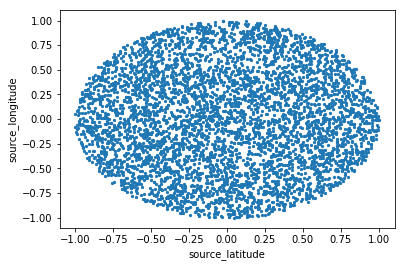

In [9]:
commute_data.plot.scatter(x='source_latitude', y='source_longitude', marker='.')

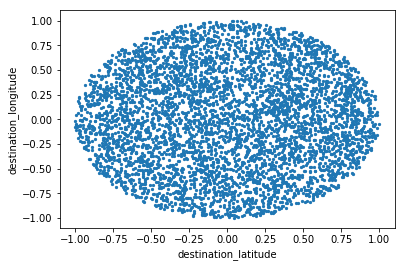

In [10]:
commute_data.plot.scatter(x='destination_latitude', y='destination_longitude', marker='.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1149a8cf8>]],
      dtype=object)

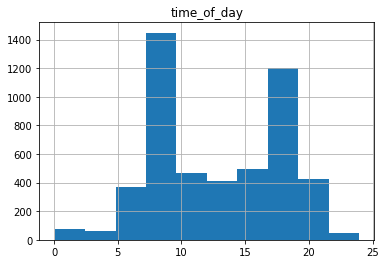

In [11]:
commute_data.hist(column='time_of_day')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114aac908>,
      dtype=object)

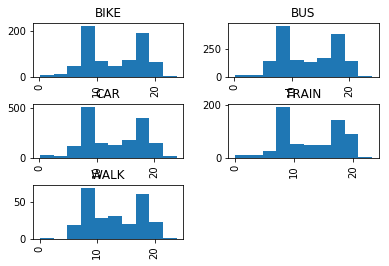

In [12]:
commute_data.hist(column='time_of_day', by='commute_type')

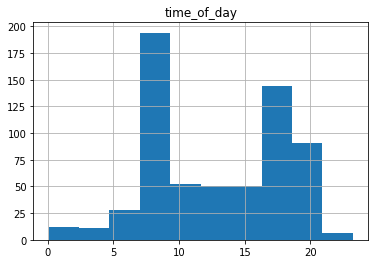

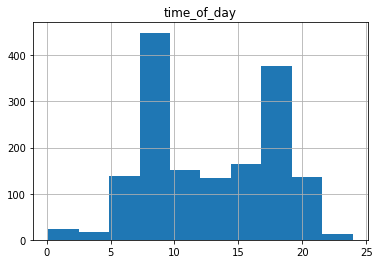

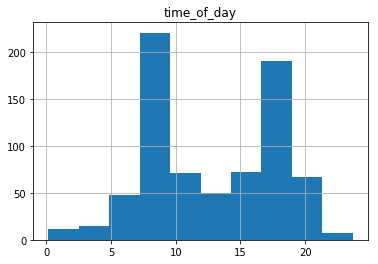

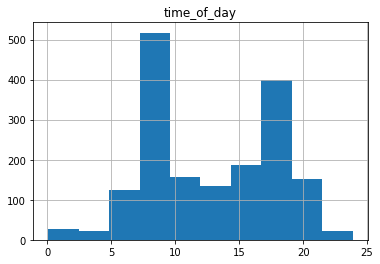

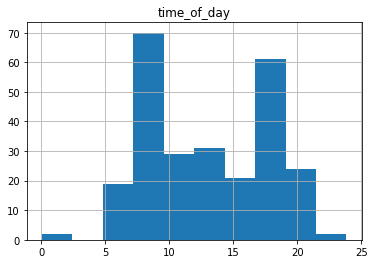

In [13]:
for i in commute_data['commute_type'].unique():
    commute_data[commute_data['commute_type'] == i].hist(column='time_of_day')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d7ad518>]],
      dtype=object)

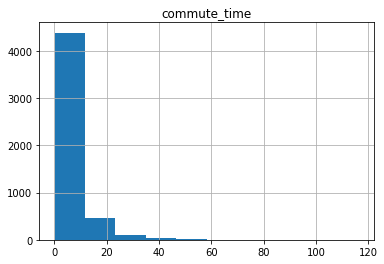

In [14]:
commute_data.hist(column='commute_time')

In [16]:
commute_data['commute_time_log'] = np.log(commute_data['commute_time'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dd70e10>]],
      dtype=object)

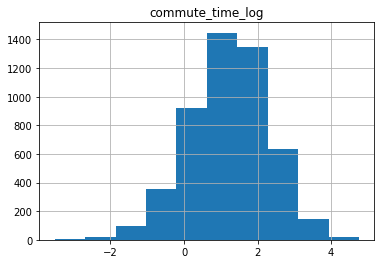

In [17]:
commute_data.hist(column='commute_time_log')

TRAIN
BUS
BIKE
CAR
WALK


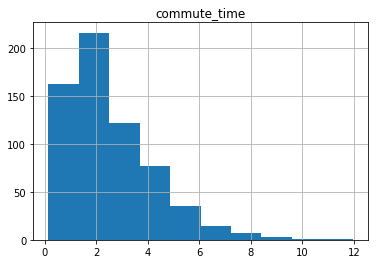

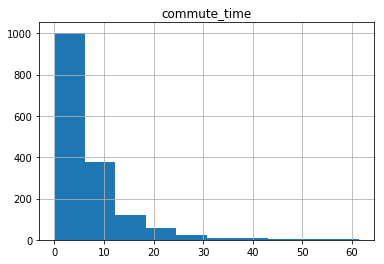

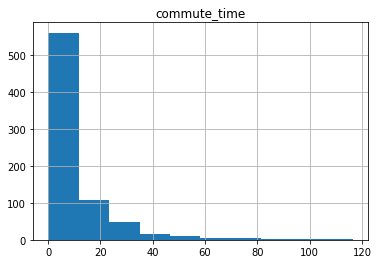

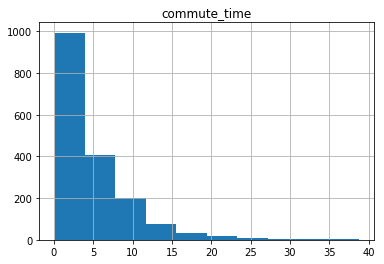

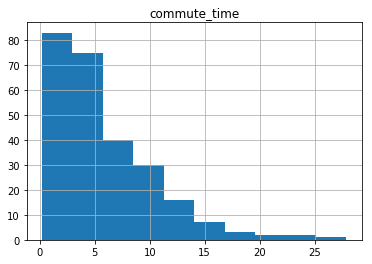

In [18]:
for i in commute_data['commute_type'].unique():
    print(i)
    commute_data[commute_data['commute_type'] == i].hist(column='commute_time')

TRAIN
BUS
BIKE
CAR
WALK


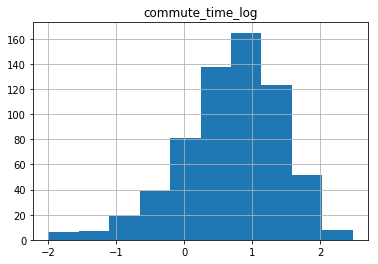

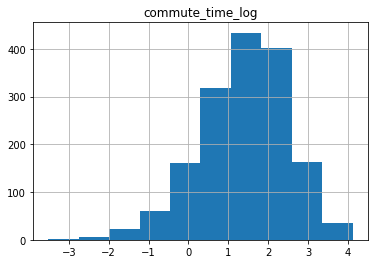

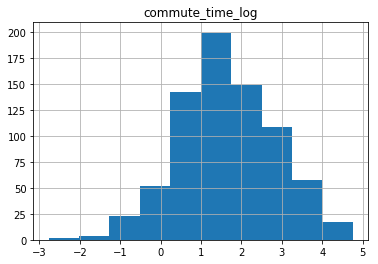

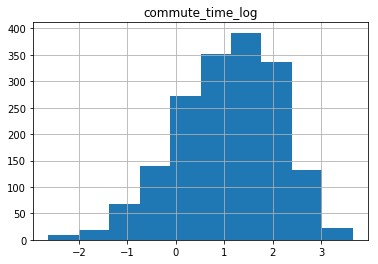

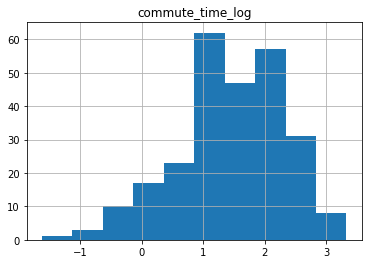

In [19]:
for i in commute_data['commute_type'].unique():
    print(i)
    commute_data[commute_data['commute_type'] == i].hist(column='commute_time_log')

In [20]:
commute_data.columns

Index(['source_latitude', 'source_longitude', 'destination_latitude',
       'destination_longitude', 'time_of_day', 'commute_type', 'commute_time',
       'commute_time_log'],
      dtype='object')

In [21]:
commute_data['distance_l2'] = np.sqrt((commute_data['source_latitude'] - commute_data['destination_latitude'])**2 + \
(commute_data['source_longitude'] - commute_data['destination_longitude'])**2)

commute_data['distance_l1'] = np.abs(commute_data['source_latitude'] - commute_data['destination_latitude']) + \
np.abs(commute_data['source_longitude'] - commute_data['destination_longitude'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ec9ae48>]],
      dtype=object)

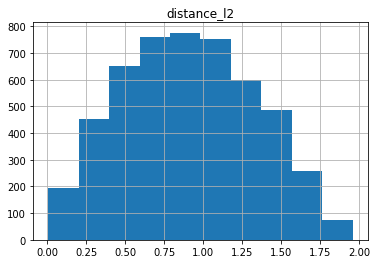

In [22]:
commute_data.hist(column='distance_l2')

TRAIN
BUS
BIKE
CAR
WALK


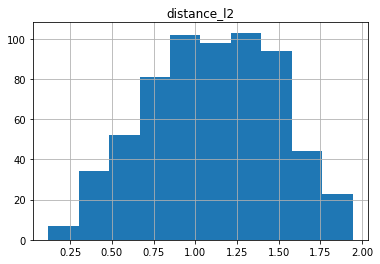

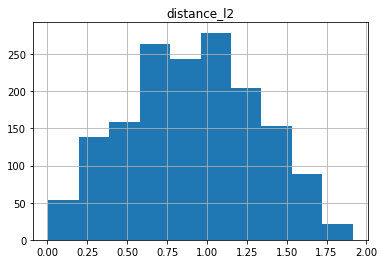

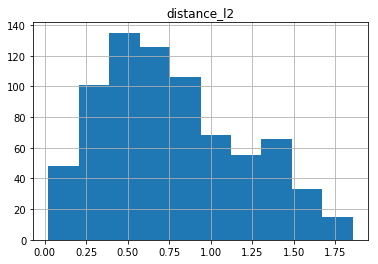

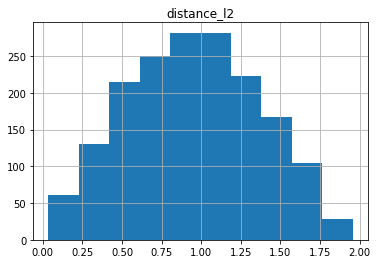

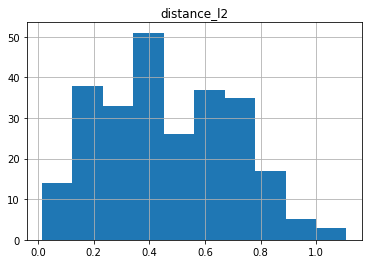

In [23]:
for i in commute_data['commute_type'].unique():
    print(i)
    commute_data[commute_data['commute_type'] == i].hist(column='distance_l2')

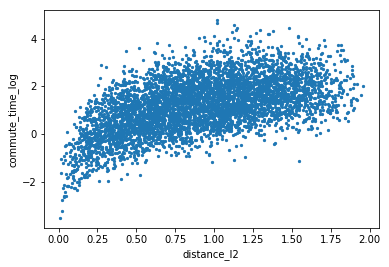

In [24]:
commute_data.plot.scatter(x='distance_l2', y='commute_time_log', marker='.')

TRAIN
BUS
BIKE
CAR
WALK


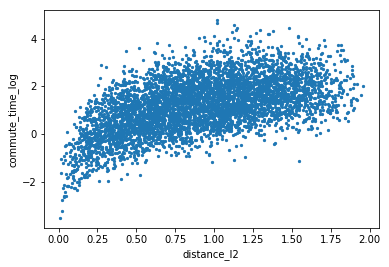

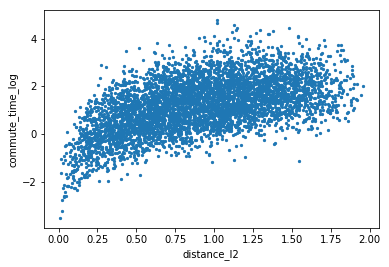

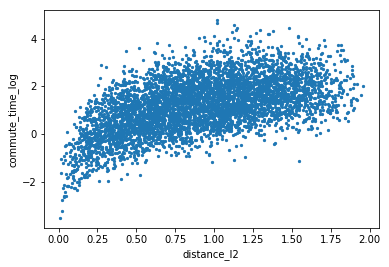

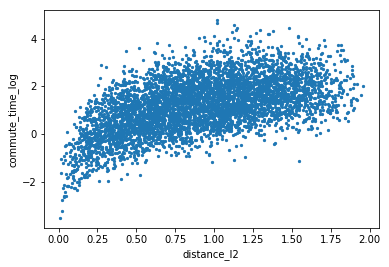

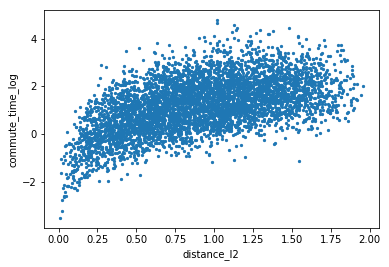

In [25]:
for i in commute_data['commute_type'].unique():
    print(i)
    commute_data.plot.scatter(x='distance_l2', y='commute_time_log', marker='.')

In [28]:
commute_data.describe()

,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day,commute_time,commute_time_log,distance_l2,distance_l1
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.003724,-0.006902,0.012960,0.005553,12.796832,5.916982,1.226507,0.906300,1.155038
std,0.499753,0.497536,0.498561,0.494092,5.004832,7.747611,1.084269,0.423205,0.553753
min,-0.995467,-0.997931,-0.996494,-0.994038,0.043999,0.029690,-3.516938,0.006523,0.009106
25%,-0.414441,-0.404376,-0.384200,-0.389426,8.205668,1.691850,0.525822,0.581554,0.734868
50%,-0.006804,-0.013751,0.012734,0.009077,12.462938,3.522443,1.259155,0.895698,1.130164
75%,0.396881,0.383145,0.414795,0.395668,17.742381,7.198691,1.973899,1.222597,1.554832
max,0.999338,0.996781,0.997974,0.998588,23.936971,116.441729,4.757391,1.956200,2.756902


In [29]:
commute_data['commute_type_numbered'] = 0
commute_data.loc[commute_data['commute_type'] == 'BUS', 'commute_type_numbered'] = 1
commute_data.loc[commute_data['commute_type'] == 'TRAIN', 'commute_type_numbered'] = 2
commute_data.loc[commute_data['commute_type'] == 'BIKE', 'commute_type_numbered'] = 3
commute_data.loc[commute_data['commute_type'] == 'CAR', 'commute_type_numbered'] = 4
commute_data.loc[commute_data['commute_type'] == 'WALK', 'commute_type_numbered'] = 5

In [30]:
commute_data['commute_type'].unique()

array(['TRAIN', 'BUS', 'BIKE', 'CAR', 'WALK'], dtype=object)

In [31]:
commute_data.head()

,source_latitude,source_longitude,destination_latitude,destination_longitude,time_of_day,commute_type,commute_time,commute_time_log,distance_l2,distance_l1,commute_type_numbered
0,-0.246417,-0.371004,0.788145,0.153165,7.205184,TRAIN,2.007165,0.696723,1.159772,1.558731,2
1,0.529953,-0.213652,-0.374896,0.476005,15.833383,BUS,3.523595,1.259482,1.137707,1.594506,1
2,-0.680644,0.592707,-0.599332,0.552698,6.444829,BUS,0.159709,-1.834404,0.090622,0.121321,1
3,-0.672678,0.713974,0.226274,0.450273,7.527271,BIKE,57.676452,4.054849,0.936831,1.162653,3
4,0.311345,0.319601,0.700752,-0.143646,19.764671,BIKE,5.169280,1.642733,0.605174,0.852654,3


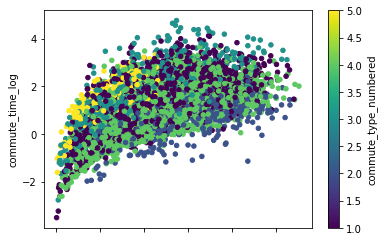

In [32]:
commute_data.plot.scatter(x='distance_l1', 
                          y='commute_time_log', 
                          c='commute_type_numbered', 
                          colormap='viridis' )